In [389]:
#VIZ AND DATA MANIPULATION LIBRARY
import numpy as np 
import pandas as pd
from dateutil.parser import parse
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

from prophet import Prophet

#METRICS
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error


In [390]:
df = pd.read_csv('input/Foreign_Exchange_Rates.xls')
print('DATASET SHAPE: ', df.shape)
df.head()

DATASET SHAPE:  (5217, 24)


,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [391]:
#show columns
df.columns = [col.lower() for col in df.columns]
df['time serie'] = pd.to_datetime(df['time serie'])
df.columns

Index(['unnamed: 0', 'time serie', 'australia - australian dollar/us$',
       'euro area - euro/us$', 'new zealand - new zeland dollar/us$',
       'united kingdom - united kingdom pound/us$', 'brazil - real/us$',
       'canada - canadian dollar/us$', 'china - yuan/us$',
       'hong kong - hong kong dollar/us$', 'india - indian rupee/us$',
       'korea - won/us$', 'mexico - mexican peso/us$',
       'south africa - rand/us$', 'singapore - singapore dollar/us$',
       'denmark - danish krone/us$', 'japan - yen/us$',
       'malaysia - ringgit/us$', 'norway - norwegian krone/us$',
       'sweden - krona/us$', 'sri lanka - sri lankan rupee/us$',
       'switzerland - franc/us$', 'taiwan - new taiwan dollar/us$',
       'thailand - baht/us$'],
      dtype='object')

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   unnamed: 0                                 5217 non-null   int64         
 1   time serie                                 5217 non-null   datetime64[ns]
 2   australia - australian dollar/us$          5217 non-null   object        
 3   euro area - euro/us$                       5217 non-null   object        
 4   new zealand - new zeland dollar/us$        5217 non-null   object        
 5   united kingdom - united kingdom pound/us$  5217 non-null   object        
 6   brazil - real/us$                          5217 non-null   object        
 7   canada - canadian dollar/us$               5217 non-null   object        
 8   china - yuan/us$                           5217 non-null   object        
 9   hong kong - hong ko

In [393]:
#get the date and rates of thailand baht
data = df[['time serie', 'thailand - baht/us$']]
data.columns = ['date', 'rate']

In [394]:
#show new dataframe
data.head()

,date,rate
0,2000-01-03,36.97
1,2000-01-04,37.13
2,2000-01-05,37.1
3,2000-01-06,37.62
4,2000-01-07,37.3


In [395]:
#remove rates with a value of ND
data = data.drop(data[data['rate']=='ND'].index)
#converte the rates to numeric value
data['rate'] = pd.to_numeric(data.rate)
#sort values by date
data = data.sort_values('date', ascending=True)

In [396]:
#show feature data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5019 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5019 non-null   datetime64[ns]
 1   rate    5019 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 117.6 KB


In [397]:
#show basic stats
data.rate.describe()

count    5019.000000
mean       35.519862
std         4.563073
min        28.600000
25%        31.780000
50%        34.000000
75%        39.405000
max        45.820000
Name: rate, dtype: float64

In [398]:
data

,date,rate
0,2000-01-03,36.97
1,2000-01-04,37.13
2,2000-01-05,37.10
3,2000-01-06,37.62
4,2000-01-07,37.30
...,...,...
5211,2019-12-24,30.15
5213,2019-12-26,30.15
5214,2019-12-27,30.14
5215,2019-12-30,29.94


In [399]:
print("จำนวนข้อมูล (Number of Data Points):", len(data))
print("จำนวนตัวแปร (Number of Variables):", len(data.columns))
print("ค่าเฉลี่ย (Mean):\n", data.mean())
print("ค่าเบี่ยงเบน (Standard Deviation):\n", data.std())
print("ค่า Quantile (Q1: 25%, Median: 50%, Q3: 75%):\n", data.quantile([0.25, 0.5, 0.75]))

จำนวนข้อมูล (Number of Data Points): 5019
จำนวนตัวแปร (Number of Variables): 2
ค่าเฉลี่ย (Mean):
 date    2009-12-25 05:05:50.747160832
rate                        35.519862
dtype: object
ค่าเบี่ยงเบน (Standard Deviation):
 date    2106 days 19:36:34.628879296
rate                        4.563073
dtype: object
ค่า Quantile (Q1: 25%, Median: 50%, Q3: 75%):
                     date    rate
0.25 2004-12-29 12:00:00  31.780
0.50 2009-12-21 00:00:00  34.000
0.75 2014-12-20 12:00:00  39.405


C:\Users\tode_\AppData\Local\Temp\ipykernel_9100\3988141366.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.rate, bins=10, color='steelblue');


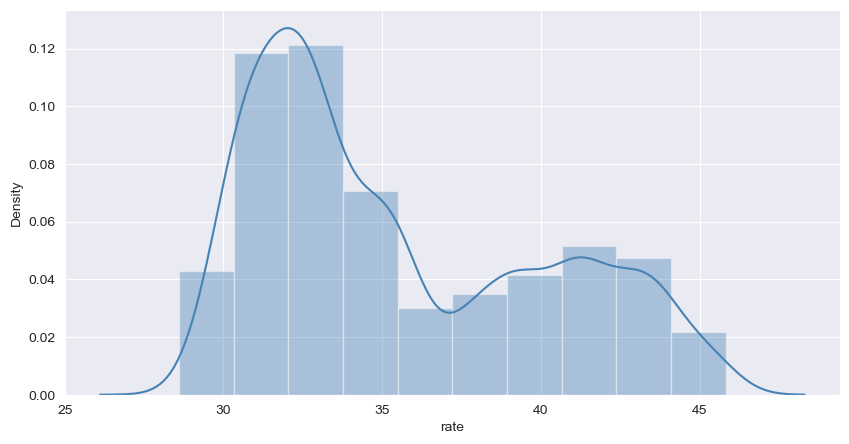

In [400]:
plt.figure(figsize=(10,5))
sns.distplot(data.rate, bins=10, color='steelblue');

PROPHET Fit

In [401]:
# Assuming your DataFrame is named 'df'
data_prophet = data.rename(columns={'date': 'ds', 'rate': 'y'})
data_prophet

,ds,y
0,2000-01-03,36.97
1,2000-01-04,37.13
2,2000-01-05,37.10
3,2000-01-06,37.62
4,2000-01-07,37.30
...,...,...
5211,2019-12-24,30.15
5213,2019-12-26,30.15
5214,2019-12-27,30.14
5215,2019-12-30,29.94


Train/Test Split

In [402]:
data_prophet_train = data_prophet.drop(data_prophet.tail(30).index)
data_prophet_test = data_prophet.tail(30)

In [403]:
from sklearn.model_selection import ParameterGrid

In [404]:
# Define the parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all possible combinations of parameters
grid = ParameterGrid(param_grid)

# Initialize variables to track the best model and its performance
best_params = None
best_mse = float('inf')

In [405]:
# Iterate over all parameter combinations
for params in grid:
    # Initialize and fit the Prophet model with the current parameters
    model = Prophet(**params)
    model.fit(data_prophet_train)
    
    # Make predictions on the test set
    future = pd.DataFrame({'ds': data_prophet_test.ds})
    forecast = model.predict(future)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(data_prophet_test['y'], forecast['yhat'][-len(data_prophet_test):])
    
    # Update best parameters if the current model performs better
    if mse < best_mse:
        best_params = params
        best_mse = mse

19:30:55 - cmdstanpy - INFO - Chain [1] start processing
19:30:56 - cmdstanpy - INFO - Chain [1] done processing
19:30:57 - cmdstanpy - INFO - Chain [1] start processing
19:30:58 - cmdstanpy - INFO - Chain [1] done processing
19:30:59 - cmdstanpy - INFO - Chain [1] start processing
19:31:00 - cmdstanpy - INFO - Chain [1] done processing
19:31:00 - cmdstanpy - INFO - Chain [1] start processing
19:31:01 - cmdstanpy - INFO - Chain [1] done processing
19:31:02 - cmdstanpy - INFO - Chain [1] start processing
19:31:03 - cmdstanpy - INFO - Chain [1] done processing
19:31:04 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1] done processing
19:31:05 - cmdstanpy - INFO - Chain [1] start processing
19:31:05 - cmdstanpy - INFO - Chain [1] done processing
19:31:06 - cmdstanpy - INFO - Chain [1] start processing
19:31:07 - cmdstanpy - INFO - Chain [1] done processing
19:31:07 - cmdstanpy - INFO - Chain [1] start processing
19:31:08 - cmdstanpy - INFO - Chain [1]

In [406]:
# Print the best parameters found
print("Best parameters found: ", best_params)
fbprophet = Prophet(**best_params)
fbprophet.fit(data_prophet_train)

Best parameters found:  {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}


19:34:53 - cmdstanpy - INFO - Chain [1] start processing
19:35:01 - cmdstanpy - INFO - Chain [1] done processing


Predict & Plot

In [407]:
# Make Future Predictions
# Create a DataFrame with the dates you want to predict for
future = pd.DataFrame({'ds': data_prophet_test.ds})

# future = fbprophet.make_future_dataframe(periods=30)  # Extend dataframe for 365 days into the future
forecast = fbprophet.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-18,30.455498,29.937697,31.429917,30.455498,30.455498,0.228252,0.228252,0.228252,0.030488,0.030488,0.030488,0.197764,0.197764,0.197764,0.0,0.0,0.0,30.683750
1,2019-11-19,30.451638,29.901965,31.372796,30.451638,30.451638,0.226614,0.226614,0.226614,0.029955,0.029955,0.029955,0.196659,0.196659,0.196659,0.0,0.0,0.0,30.678252
2,2019-11-20,30.447778,29.915659,31.353135,30.447778,30.447778,0.221360,0.221360,0.221360,0.026850,0.026850,0.026850,0.194510,0.194510,0.194510,0.0,0.0,0.0,30.669137
3,2019-11-21,30.443917,29.951783,31.377700,30.443917,30.443917,0.218148,0.218148,0.218148,0.026858,0.026858,0.026858,0.191289,0.191289,0.191289,0.0,0.0,0.0,30.662065
4,2019-11-22,30.440057,29.952973,31.370464,30.440057,30.440057,0.209668,0.209668,0.209668,0.022674,0.022674,0.022674,0.186993,0.186993,0.186993,0.0,0.0,0.0,30.649725
5,2019-11-25,30.428476,29.939711,31.341198,30.428476,30.428476,0.198447,0.198447,0.198447,0.030488,0.030488,0.030488,0.167959,0.167959,0.167959,0.0,0.0,0.0,30.626923
6,2019-11-26,30.424616,29.915747,31.300715,30.424616,30.424616,0.189735,0.189735,0.189735,0.029955,0.029955,0.029955,0.159780,0.159780,0.159780,0.0,0.0,0.0,30.614351
7,2019-11-27,30.420756,29.898937,31.319509,30.420756,30.420756,0.177691,0.177691,0.177691,0.026850,0.026850,0.026850,0.150840,0.150840,0.150840,0.0,0.0,0.0,30.598446
8,2019-11-29,30.413035,29.883121,31.240181,30.413035,30.413035,0.153855,0.153855,0.153855,0.022674,0.022674,0.022674,0.131181,0.131181,0.131181,0.0,0.0,0.0,30.566890
9,2019-12-02,30.401454,29.834699,31.251121,30.401454,30.401454,0.129876,0.129876,0.129876,0.030488,0.030488,0.030488,0.099388,0.099388,0.099388,0.0,0.0,0.0,30.531330


c:\Users\tode_\anaconda3\envs\ML_Lab\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\tode_\anaconda3\envs\ML_Lab\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


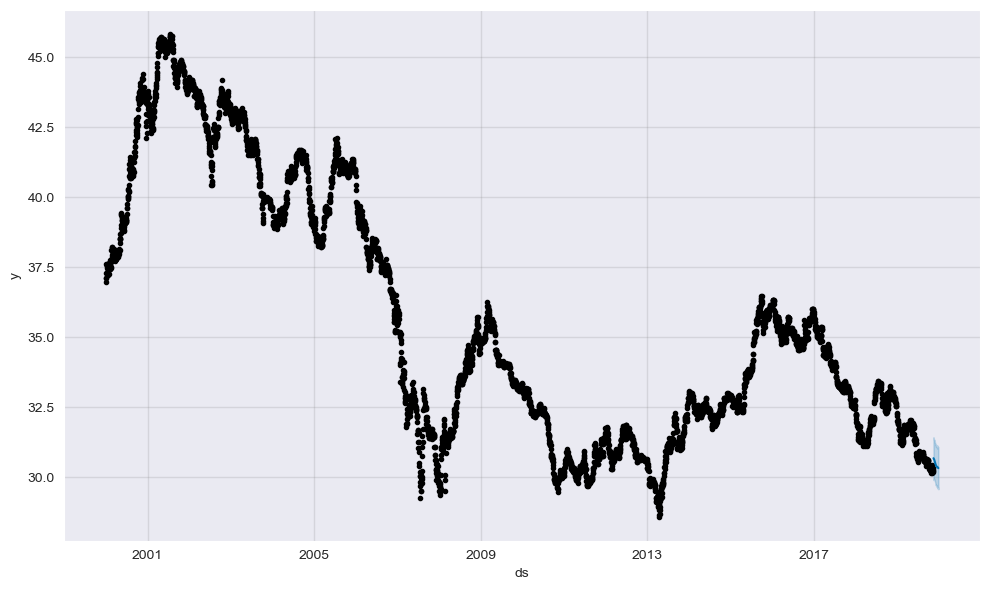

In [408]:
# Visualize Results
fig = fbprophet.plot(forecast)

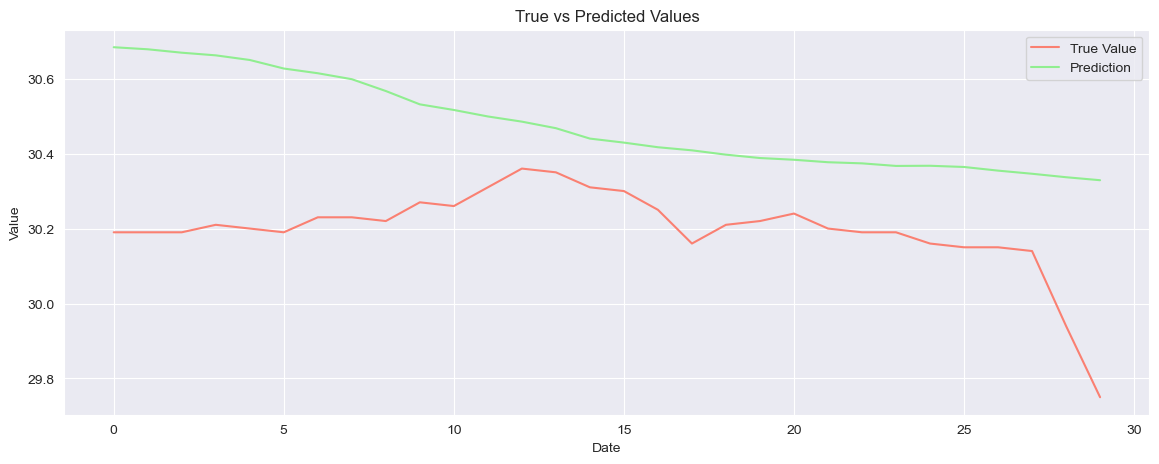

In [409]:
# Merge forecast with original DataFrame on the 'ds' column
merged_df = pd.merge(data_prophet, forecast[['ds', 'yhat']], on='ds', how='outer')

# Plot the true values and predicted values
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
plt.plot(np.arange(len(merged_df['ds'].tail(30))), merged_df['y'].tail(30), color='salmon')
plt.plot(np.arange(len(merged_df['ds'].tail(30))), merged_df['yhat'].tail(30), color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('True vs Predicted Values')
plt.legend(['True Value', 'Prediction'])
plt.show()

XGBoost Fit

In [410]:
data_xgb = data.copy()
#extract the date feature
data_xgb['day'] = data_xgb.date.dt.day
data_xgb['dayofweek'] = data_xgb.date.dt.dayofweek
data_xgb['dayofyear'] = data_xgb.date.dt.dayofyear
data_xgb['week'] = data_xgb.date.dt.isocalendar().week
data_xgb['month'] = data_xgb.date.dt.month
data_xgb['year'] = data_xgb.date.dt.year

In [411]:
#add lag feature
for i in range(1,8):
    data_xgb['lag'+str(i)] = data_xgb.rate.shift(i).fillna(0)

In [412]:
#drop the date feature
data_xgb.drop('date', axis=1, inplace=True)
#show new data frame
data_xgb.head(7)

,rate,day,dayofweek,dayofyear,week,month,year,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,36.97,3,0,3,1,1,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,37.13,4,1,4,1,1,2000,36.97,0.00,0.00,0.00,0.00,0.00,0.0
2,37.10,5,2,5,1,1,2000,37.13,36.97,0.00,0.00,0.00,0.00,0.0
3,37.62,6,3,6,1,1,2000,37.10,37.13,36.97,0.00,0.00,0.00,0.0
4,37.30,7,4,7,1,1,2000,37.62,37.10,37.13,36.97,0.00,0.00,0.0
5,37.27,10,0,10,2,1,2000,37.30,37.62,37.10,37.13,36.97,0.00,0.0
6,37.61,11,1,11,2,1,2000,37.27,37.30,37.62,37.10,37.13,36.97,0.0


Train/Test Split

In [413]:
X = data_xgb.drop('rate', axis=1)
y = data_xgb.rate

X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

In [414]:
#convert data to xgb matrix form
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test)

In [415]:
#bayesian hyper parameter tuning
#define the params
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    
    cv_result = xgb.cv(params, dtrain, num_boost_round=250, nfold=3)    
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [416]:
#run optimizer
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})

# Create an instance of UtilityFunction with the desired parameters
utility = UtilityFunction(kind="ei", kappa=2.576, xi=0.0)

#define iter points
xgb_bo.maximize(init_points=10, n_iter=15, acquisition_function=utility)

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------


| 1         | -0.1766   | 0.7806    | 0.544     | 4.837     |
| 2         | -0.1765   | 0.7023    | 0.4249    | 4.456     |
| 3         | -0.1761   | 0.6942    | 0.3375    | 4.109     |
| 4         | -0.1743   | 0.7331    | 0.005417  | 3.848     |
| 5         | -0.1958   | 0.4394    | 0.8345    | 5.644     |
| 6         | -0.197    | 0.3763    | 0.7753    | 6.559     |
| 7         | -0.1982   | 0.3345    | 0.537     | 5.519     |
| 8         | -0.1637   | 0.645     | 0.01563   | 6.104     |
| 9         | -0.196    | 0.5155    | 0.93      | 4.058     |
| 10        | -0.1744   | 0.8503    | 0.4334    | 4.297     |
| 11        | -0.1703   | 0.8831    | 0.0       | 6.152     |
| 12        | -0.1918   | 0.5087    | 0.6916    | 6.002     |
| 13        | -0.1656   | 0.5057    | 0.0       | 6.239     |
| 14        | -0.165    | 0.5077    | 0.006457  | 6.215     |
| 15        | -0.165    | 0.5399    | 0.0       | 6.015     |
| 16        | -0.1721   | 0.9       | 0.0       | 4.587     |
| 17    

In [417]:
#get the best parameters
params = xgb_bo.max['params']
params['max_depth'] = int(round(params['max_depth']))
#train the data
model = xgb.train(params, dtrain, num_boost_round=200)

In [418]:
params

{'colsample_bytree': 0.3547944344045185, 'gamma': 0.0, 'max_depth': 6}

Predict & Plot

In [419]:
#predict the test data 
predictions = model.predict(dtest)

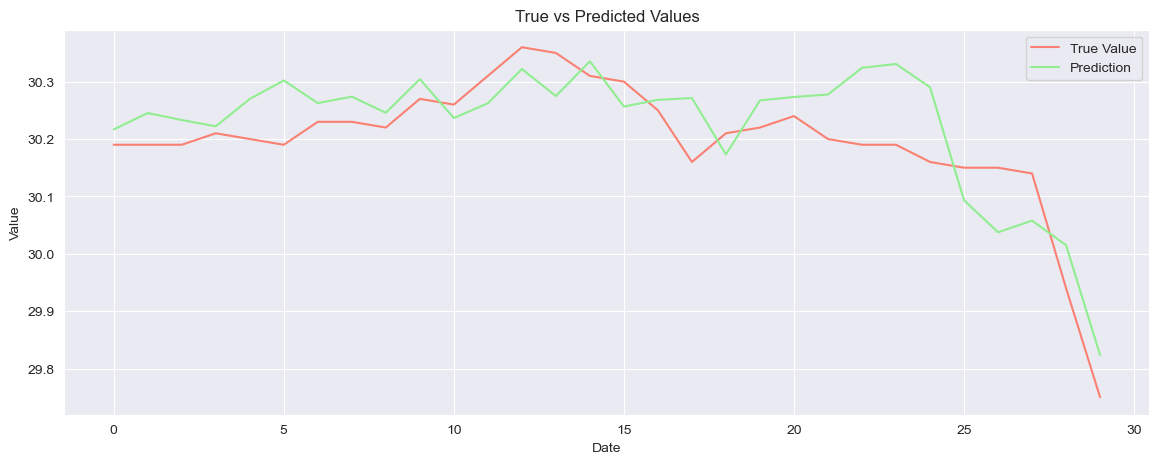

In [423]:
y_val = data_xgb.rate[-30:]
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
plt.plot(np.arange(len(y_val)), y_val, color='salmon')
plt.plot(np.arange(len(y_val)), predictions, color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(['True Value', 'Prediction'])
plt.title('True vs Predicted Values')
plt.show()

XGBoost

In [424]:
# Evaluate the predictions
xgb_mae = mean_absolute_error(y_val, predictions)
xgb_mse = mean_squared_error(y_val, predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_val, predictions))

print('Mean Absolute Error:   ', xgb_mae)
print('Mean Squared Error:   ', xgb_mse)
print('Root Mean Squared Error:   ', xgb_rmse)

xgb_error_rate = abs(((y_val - predictions) / y_val).mean()) * 100
print('MAPE:', round(xgb_error_rate,2), '%')

print('R2-SCORE: ', r2_score(y_val, predictions))

Mean Absolute Error:    0.06129213968912749
Mean Squared Error:    0.00508019795122824
Root Mean Squared Error:    0.07127550737264689
MAPE: 0.09 %
R2-SCORE:  0.5990864792443771


PROPHET

In [425]:
# Evaluate the predictions
y_true = data_prophet['y'].tail(30).values
y_pred = forecast['yhat'].values[:len(y_true)]

prophet_mae = mean_absolute_error(y_true, y_pred)
prophet_mse = mean_squared_error(y_true, y_pred)
prophet_rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print('Mean Absolute Error:   ', prophet_mae)
print('Mean Squared Error:   ', prophet_mse)
print('Root Mean Squared Error:   ', prophet_rmse)

prophet_error_rate = abs(((y_true - y_pred) / y_true).mean()) * 100
print('MAPE:', round(prophet_error_rate,2), '%')

print('R2-SCORE: ', r2_score(y_true, y_pred))

Mean Absolute Error:    0.2789688467480405
Mean Squared Error:    0.09606811870496422
Root Mean Squared Error:    0.3099485742909043
MAPE: 0.92 %
R2-SCORE:  -6.581399006915575
